In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [15]:
# Goal of this dataset is to predict insurance charges from other data.
# Target variable = charges.
# Other variables = age, sex, BMI, children, smoker, region.
# Research how violin plots work, to add a new tool to my visualization toolbox.
# Categorical data must be converted to numerical in order to do a ML algorithm.
# pd.get_dummies function to start encoding process. 
# Define columns using table function.
# Remember drop_first=True and dtype=int8 and then df_encode in next cell.
# Box-Cox transformation to turn non-parametric data into a normal distribution.
# from sklearn.model_selection import train_test_split
# lin_reg = Linear_Regression() to identify it. 
# lin_reg.fit()
# from sklearn.metrics import mean_squared_error
# Task for the day = make an algorithm that predicts house prices in the other dataset by EOD.


insurance_data=pd.read_csv('insuranceML.csv')
insurance_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
insurance_data.describe().round(3)

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [17]:
insurance_data.columns[insurance_data.isnull().any()]

Index([], dtype='object')

In [18]:
insurance_data.shape

(1338, 7)

In [19]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
insurance_data.loc[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


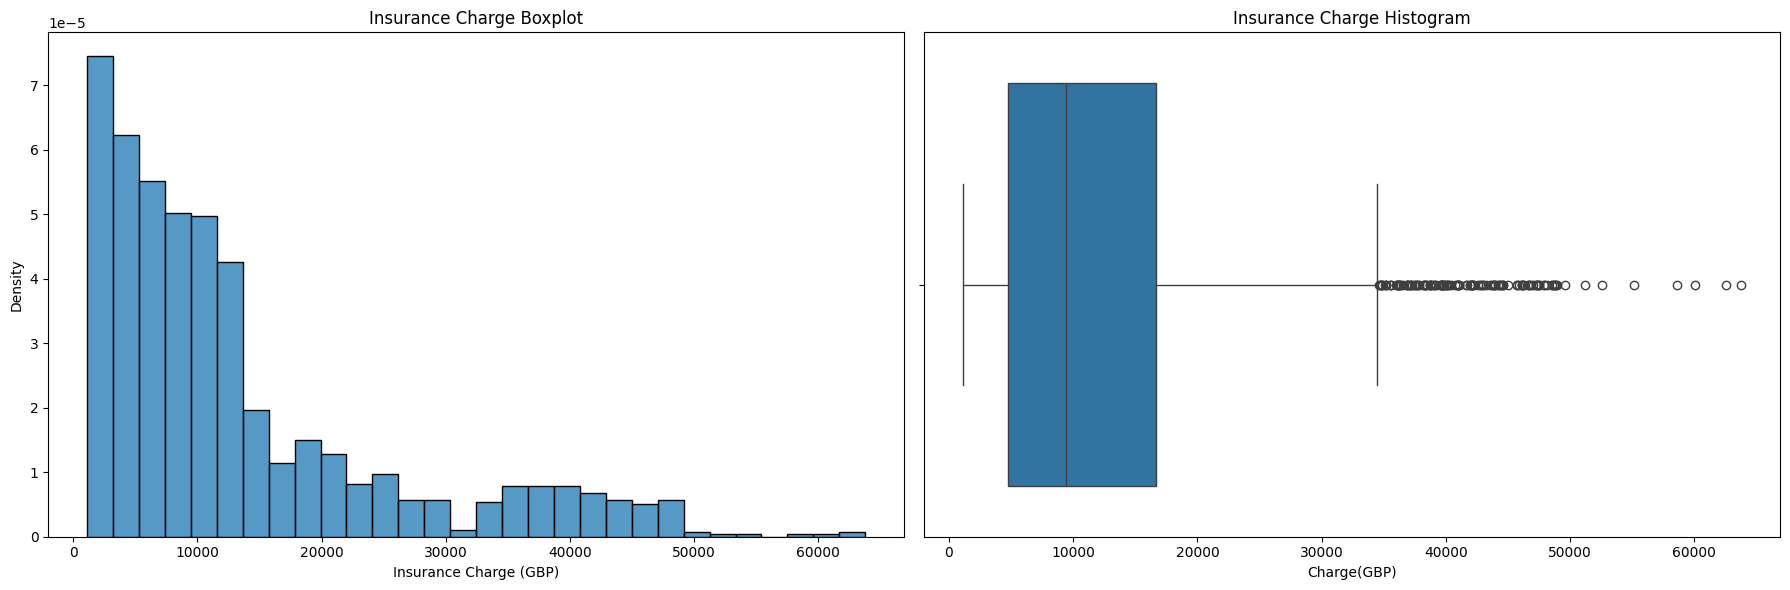

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].set(title='Insurance Charge Boxplot', xlabel='Insurance Charge (GBP)', ylabel='Density')
ax[1].set(title='Insurance Charge Histogram', xlabel='Charge(GBP)')
sns.boxplot(data=insurance_data, x='charges', ax=ax[1])
sns.histplot(insurance_data['charges'], ax=ax[0], stat='density')
plt.tight_layout()

In [22]:
# Positive skew, non-parametric data. 

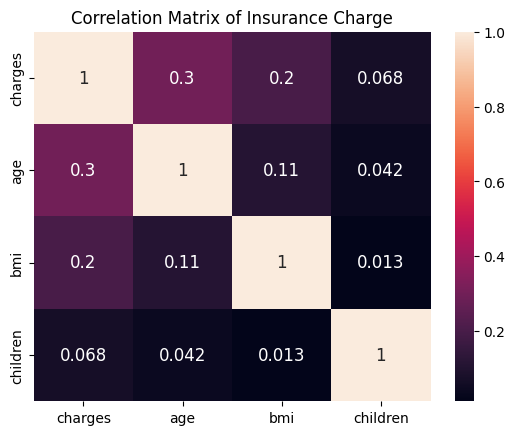

In [33]:
insurance_data = pd.read_csv('insuranceML.csv')
corr_matrix_1 = insurance_data[['charges','age', 'bmi', 'children']].corr()
sns.heatmap(corr_matrix_1, annot=True, annot_kws={'fontsize': 12})
plt.title('Correlation Matrix of Insurance Charge')
plt.show()

In [35]:
# Output shows weak positive correlations with age and BMI, but not with number of children. 
# Let's try violin plot.